In [104]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [105]:
# Import Data
df = pd.read_csv('column_with_nan.csv', sep=",")
print(df.head())
T = np.array(df.iloc[:,4])
imp_mean = IterativeImputer(random_state=0,missing_values=np.nan)
T = imp_mean.fit_transform(T.reshape(-1,1))
grid_shape = (9,8)

   Benzene  eq_ratio   X   Y  Temperature
0      0.0       0.8   0  70  1626.823165
1      0.0       0.8  10  70  1457.396340
2      0.0       0.8  15  70  1326.435723
3      0.0       0.8  20  70  1194.024158
4      0.0       0.8  30  70  1020.130396


In [106]:
X = np.array(df.iloc[:,:4])# Matrix of the features
y = T # Matrix of the target

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create the test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale and center the data
scalerX = StandardScaler()

X0_train = scalerX.fit_transform(X_train)

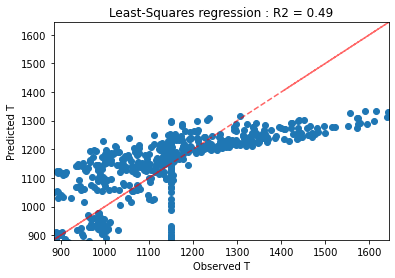

In [155]:
from sklearn.linear_model import LinearRegression

# Create the linear regression object
LS_reg = LinearRegression().fit(X0_train, y_train)

# To test the regression, we need to scale and center also the test data
X0_test = scalerX.transform(X_test)

y_pred_LS = LS_reg.predict(X0_test)

plt.scatter(y_test, y_pred_LS)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed T')
plt.ylabel('Predicted T')
plt.title("Least-Squares regression : R2 = 0.49")
plt.savefig("LQR.png", dpi=72) 
plt.show()

In [109]:
from sklearn.metrics import r2_score
LS_score = LS_reg.score(X0_test, y_test)
r2 = r2_score(y_test, y_pred_LS)
print(LS_score,r2)

0.488393281972038 0.488393281972038


# Gradient boost

/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


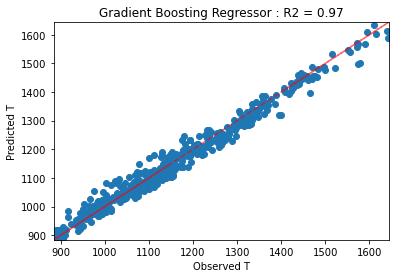

0.9746483626920236


In [156]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X0_train, y_train)
y_pred_GBR = reg.predict(X0_test)
r2 = r2_score(y_test, y_pred_GBR)

plt.scatter(y_test, y_pred_GBR)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed T')
plt.ylabel('Predicted T')
plt.title("Gradient Boosting Regressor : R2 = 0.97")
plt.savefig("GBR", dpi=72) 
plt.show()

print(r2)

In [150]:
df2 = pd.read_csv('column_with_nan.csv', sep=",")
for i, row in df2.iterrows():
    value = row["Temperature"]
    if pd.isnull(value):
        row_test = row.values[:4]
        p = reg.predict(row_test.reshape(1,-1))
        print(p)
        df2.loc[i,'Temperature'] = p
print(df2)   
df2.to_csv ('RegressionNAN.csv',index = False, header=True)
        

[1158.81593745]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1158.81593745]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1158.81593745]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1158.81593745]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1158.81593745]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1158.81593745]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1124.51012988]
[1142.32195486]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1142.32195486]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77965079]
[1141.77